# 🇰🇷 South Korea

1. How has the rate of infection changed over time?
1. How were the different regions of South Korea affected by the COVID-19 outbreak?
1. What percentage of total confirmed is made up by Shincheonji?
1. Demographically, who is the most vulnerable?
1. What is the fatality rate?

_Data courtesy of Korea Centers for Disease Control and Prevention (KCDC)_

In [1]:
ls

Korea.ipynb   README.md     data/         proposal.md   questions.md


In [2]:
cd data

/Users/cherishkim/Code/covid/data


In [3]:
cd korea

/Users/cherishkim/Code/covid/data/korea


In [4]:
cd coronavirusdataset

/Users/cherishkim/Code/covid/data/korea/coronavirusdataset


In [27]:
from scipy import stats
import math
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(15,11)}) #standardize sizing for seaborn plots

# How has the rate of infection changed over time?

In [6]:
time = pd.read_csv("Time.csv")
time.head()

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


In [7]:
time.dtypes

date         object
time          int64
test          int64
negative      int64
confirmed     int64
released      int64
deceased      int64
dtype: object

In [8]:
time['date'] = pd.to_datetime(time['date'])
time.dtypes

date         datetime64[ns]
time                  int64
test                  int64
negative              int64
confirmed             int64
released              int64
deceased              int64
dtype: object

In [9]:
time.head()

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


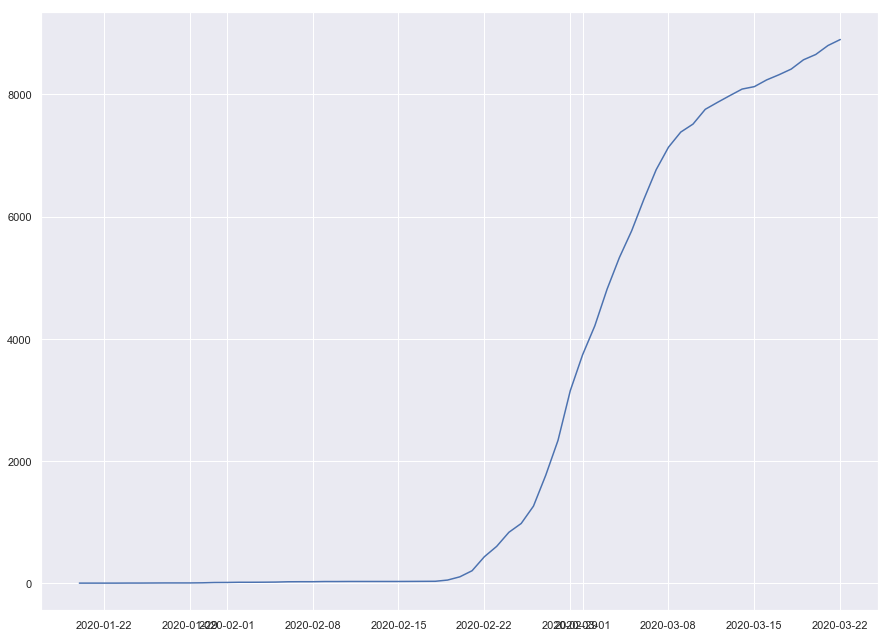

In [28]:
plt.plot(time['date'], time['confirmed'])
plt.show()

# How were the different regions of South Korea affected by the COVID-19 outbreak?

In [11]:
case = pd.read_csv("Case.csv")
case.head()

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Guro-gu,True,Guro-gu Call Center,79,37.508163,126.884387
1,1000002,Seoul,Dongdaemun-gu,True,Dongan Church,24,37.592888,127.056766
2,1000003,Seoul,Eunpyeong-gu,True,Eunpyeong St. Mary's Hospital,14,37.63369,126.9165
3,1000004,Seoul,Seongdong-gu,True,Seongdong-gu APT,13,37.55713,127.0403
4,1000005,Seoul,Jongno-gu,True,Jongno Community Center,10,37.57681,127.006


In [12]:
case['province'].unique()

array(['Seoul', 'Busan', 'Daegu', 'Gwangju', 'Incheon', 'Daejeon',
       'Ulsan', 'Sejong', 'Gyeonggi-do', 'Gangwon-do',
       'Chungcheongbuk-do', 'Chungcheongnam-do', 'Jeollabuk-do',
       'Jeollanam-do', 'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Jeju-do'],
      dtype=object)

In [13]:
seoul = case[(case['province'] == 'Seoul')]
busan = case[(case['province'] == 'Busan')]
daegu = case[(case['province'] == 'Daegu')]
gwangju = case[(case['province'] == 'Gwangju')]
incheon = case[(case['province'] == 'Incheon')]
daejeon = case[(case['province'] == 'Daejeon')]
ulsan = case[(case['province'] == 'Ulsan')]
sejong = case[(case['province'] == 'Sejong')]
gyeonggido = case[(case['province'] == 'Gyeonggi-do')]
gangwondo = case[(case['province'] == 'Gangwon-do')]
chungcheongbukdo = case[(case['province'] == 'Chungcheongbuk-do')]
chungcheongnamdo = case[(case['province'] == 'Chungcheongnam-do')]
jeollabukdo = case[(case['province'] == 'Jeollabuk-do')]
jeollanamdo = case[(case['province'] == 'Jeollanam-do')]
gyeongsangbukdo = case[(case['province'] == 'Gyeongsangbuk-do')]
gyeongsangnamdo = case[(case['province'] == 'Gyeongsangnam-do')]
jejudo = case[(case['province'] == 'Jeju-do')]

In [14]:
print("BREAKDOWN:")
    
print("Seoul: " + str(seoul["confirmed"].sum()))
print("Busan: " + str(busan["confirmed"].sum()))
print("Daegu: " + str(daegu["confirmed"].sum()))
print("Gwangju: " + str(gwangju["confirmed"].sum()))
print("Incheon: " + str(incheon["confirmed"].sum()))
print("Daejeon: " + str(daejeon["confirmed"].sum()))
print("Ulsan: " + str(ulsan["confirmed"].sum()))
print("Sejong: " + str(sejong["confirmed"].sum()))
print("Gyeonggi-do: " + str(gyeonggido["confirmed"].sum()))
print("Gangwon-do: " + str(gangwondo["confirmed"].sum()))
print("Chungcheongbuk-do: " + str(chungcheongbukdo["confirmed"].sum()))
print("Chungcheongnam-do: " + str(chungcheongnamdo["confirmed"].sum()))
print("Jeollabuk-do: " + str(jeollabukdo["confirmed"].sum()))
print("Jeollanam-do: " + str(jeollanamdo["confirmed"].sum()))
print("Gyeongsangbuk-do: " + str(gyeongsangbukdo["confirmed"].sum()))
print("Gyeongsangnam-do: " + str(gyeongsangnamdo["confirmed"].sum()))
print("Jeju-do: " + str(jejudo["confirmed"].sum()))

BREAKDOWN:
Seoul: 218
Busan: 91
Daegu: 6066
Gwangju: 16
Incheon: 30
Daejeon: 22
Ulsan: 28
Sejong: 40
Gyeonggi-do: 164
Gangwon-do: 29
Chungcheongbuk-do: 31
Chungcheongnam-do: 115
Jeollabuk-do: 7
Jeollanam-do: 4
Gyeongsangbuk-do: 1145
Gyeongsangnam-do: 85
Jeju-do: 4


In [15]:
print(6066/8095)

0.7493514515132798


In [16]:
print(1145/8095)

0.14144533662754788


The city of **Daegu** was slammed with **74.93%** of all cases; trailing in distant second place is **Northern Gyeongsang Province** with **14.14%** of all cases.

# What percentage of total confirmed is made up by Shincheonji (_a particularly fervent offshoot of Christianity whose churches are located primarily in Daegu_)?

In [17]:
case["infection_case"].describe()

count      81
unique     33
top       etc
freq       17
Name: infection_case, dtype: object

In [18]:
case["infection_case"].unique()

array(['Guro-gu Call Center', 'Dongan Church',
       "Eunpyeong St. Mary's Hospital", 'Seongdong-gu APT',
       'Jongno Community Center', 'Jung-gu Fashion Company',
       'Shincheonji Church', 'etc', 'Onchun Church',
       'Suyeong-gu Kindergarten', 'Haeundae-gu Catholic Church',
       'Jin-gu Academy', 'Cheongdo Daenam Hospital',
       'contact with patient', 'overseas inflow', 'Seosan-si Laboratory',
       'Ministry of Oceans and Fisheries', 'gym facility in Sejong',
       'Bundang Jesaeng Hospital', 'River of Grace Community Church',
       'Suwon Saeng Myeong Saem Church', 'gym facility in Cheonan',
       'Goesan-gun Jangyeon-myeon', 'Bonghwa Pureun Nursing Home',
       'Pilgrimage to Israel', 'Milal Shelter',
       'Gyeongsan Seorin Nursing Home', 'Gyeongsan Jeil Silver Town',
       'Gyeongsan Cham Joeun Community Center', 'Geochang Church',
       'Geochang-gun Woongyang-myeon', 'Hanmaeum Changwon Hospital',
       'Changnyeong Coin Karaoke'], dtype=object)

In [19]:
case.dtypes

case_id            int64
province          object
city              object
group               bool
infection_case    object
confirmed          int64
latitude          object
longitude         object
dtype: object

In [20]:
case["confirmed"].sum()

8095

In [21]:
cult = case[(case['infection_case'] == 'Shincheonji Church')]

In [22]:
cult['confirmed'].sum()

5012

In [23]:
print(5012/8059)

0.6219133887579104


A whopping **62.19%** of South Korean infections are affiliated with Shincheonji. The number itself is shocking, but given that
* Many members of Shincheonji went into hiding to evade health officials' attempts to track them
* Worship services are held in facilities packed to maximum capacity
* Face masks (_which could help the wearer from transmitting virally infectious droplets_) were not permitted during services. They sing and pray very vigorously. Droplets flying everywhere
* Attendance is mandatory and taken via key card. Shincheonji leaders specifically told their congregations to not miss service if they were ill

... perhaps we should not be shocked.

# Demographically, who is the most vulnerable?

In [24]:
ls

Case.csv*          Region.csv*        Time.csv*          TimeProvince.csv*
PatientInfo.csv*   SearchTrend.csv*   TimeAge.csv*       Weather.csv*
PatientRoute.csv*  SeoulFloating.csv* TimeGender.csv*


In [25]:
demography = pd.read_csv("PatientInfo.csv")
demography.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released


In [26]:
demography['age'].unique()

array(['50s', '30s', '20s', '60s', '80s', '70s', '40s', '10s', '90s',
       '0s', nan, '100s'], dtype=object)

In [41]:
males = demography[(demography['sex'] == 'male')]
len(males.index)

937

In [42]:
females = demography[(demography['sex'] == 'female')]
len(females.index)

1210